# Riemann Problem

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from kuibit.simdir import SimDir
from kuibit.grid_data import UniformGrid

## Exact Solution

In [2]:
exact = np.loadtxt("Sod_exact.dat")

In [3]:
x_exact=exact[:,0]
rho_exact=exact[:,1]
press_exact=exact[:,2]
vx_exact=exact[:,3]
vy_exact=exact[:,4]
vz_exact=exact[:,5]
By_exact=exact[:,6]
Bz_exact=exact[:,7]

Text(0, 0.5, '$\\rho$')

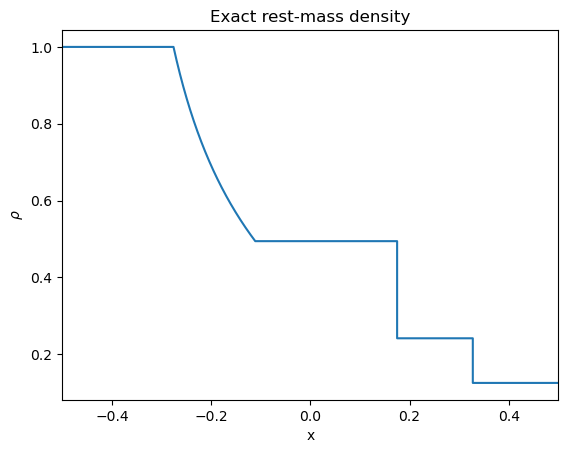

In [4]:
plt.plot(x_exact, rho_exact, label="exact")
plt.xlim(-0.5, 0.5)
plt.title('Exact rest-mass density')
plt.xlabel('x')
plt.ylabel(r'$\rho$')
#plt.savefig('rho_exact.png', facecolor='w', transparent=False, dpi=300)

Text(0, 0.5, '$v_x$')

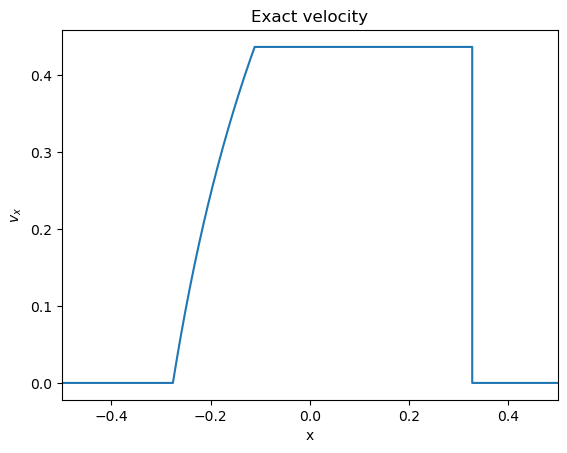

In [5]:
plt.plot(x_exact, vx_exact, label="exact")
plt.xlim(-0.5, 0.5)
plt.title('Exact velocity')
plt.xlabel('x')
plt.ylabel('$v_x$')
#plt.savefig('vx_exact.png', facecolor='w', transparent=False, dpi=300)

Text(0, 0.5, 'P')

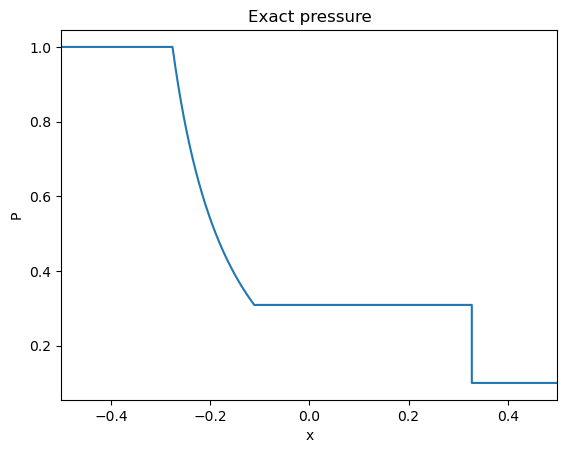

In [6]:
plt.plot(x_exact, press_exact, label="exact")
plt.xlim(-0.5, 0.5)
plt.title('Exact pressure')
plt.xlabel('x')
plt.ylabel('P')
#plt.savefig('press_exact.png', facecolor='w', transparent=False, dpi=300)

## Read the Numerical Results

In [7]:
gf_1000= SimDir("./Sod_1d_1000/").gf
gf_400= SimDir("./Sod_1d_400/").gf
gf_40= SimDir("./Sod_1d_40/").gf

In [8]:
vars1d_1000=gf_1000.x
vars1d_400=gf_400.x
vars1d_40=gf_40.x

In [9]:
rho_1000=vars1d_1000.fields.rho
rho_400=vars1d_400.fields.rho
rho_40=vars1d_40.fields.rho

In [10]:
vx_1000=vars1d_1000.fields.vel[0]
vx_400=vars1d_400.fields.vel[0]
vx_40=vars1d_40.fields.vel[0]

In [11]:
press_1000=vars1d_1000.fields.press
press_400=vars1d_400.fields.press
press_40=vars1d_40.fields.press

### Rest-Mass Density

In [12]:
small_grid = UniformGrid([101], x0=[-0.45], x1=[0.45])

In [13]:
rho_final_1000 = rho_1000.read_on_grid(500, small_grid)
rho_final_400 = rho_400.read_on_grid(200, small_grid)
rho_final_40 = rho_40.read_on_grid(100, small_grid)
rho_initial = rho_40.read_on_grid(0, small_grid)

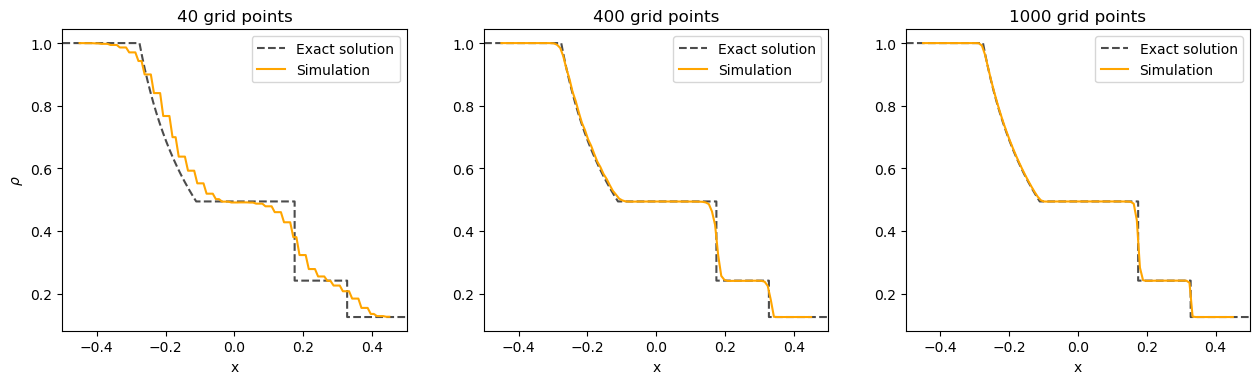

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13, 4))
fig.tight_layout(pad=2.5)

ax1.plot(x_exact, rho_exact, label="Exact solution", linestyle='--', c='black', alpha=0.7)
ax1.plot(*rho_final_40.coordinates_meshgrid(), rho_final_40.data_xyz, label="Simulation", c='orange')
ax1.set_xlim(-0.5, 0.5)
ax1.set_xlabel('x')
ax1.set_ylabel(r'$\rho$')
ax1.set_title('40 grid points')
ax1.legend()

ax2.plot(x_exact, rho_exact, label="Exact solution", linestyle='--', c='black', alpha=0.7)
ax2.plot(*rho_final_400.coordinates_meshgrid(), rho_final_400.data_xyz, label="Simulation", c='orange')
ax2.set_xlim(-0.5, 0.5)
ax2.set_xlabel('x')
ax1.set_ylabel(r'$\rho$')
ax2.set_title('400 grid points')
ax2.legend()

ax3.plot(x_exact, rho_exact, label="Exact solution", linestyle='--', c='black', alpha=0.7)
ax3.plot(*rho_final_1000.coordinates_meshgrid(), rho_final_1000.data_xyz, label="Simulation", c='orange')
ax3.set_xlim(-0.5, 0.5)
ax3.set_xlabel('x')
ax1.set_ylabel(r'$\rho$')
ax3.set_title('1000 grid points')
ax3.legend()

fig.savefig('rho.png', facecolor='w', transparent=False, dpi=300)

### Velocity

In [15]:
vx_final_1000 = vx_1000.read_on_grid(500, small_grid)
vx_final_400 = vx_400.read_on_grid(200, small_grid)
vx_final_40 = vx_40.read_on_grid(100, small_grid)
vx_initial = vx_40.read_on_grid(0, small_grid)

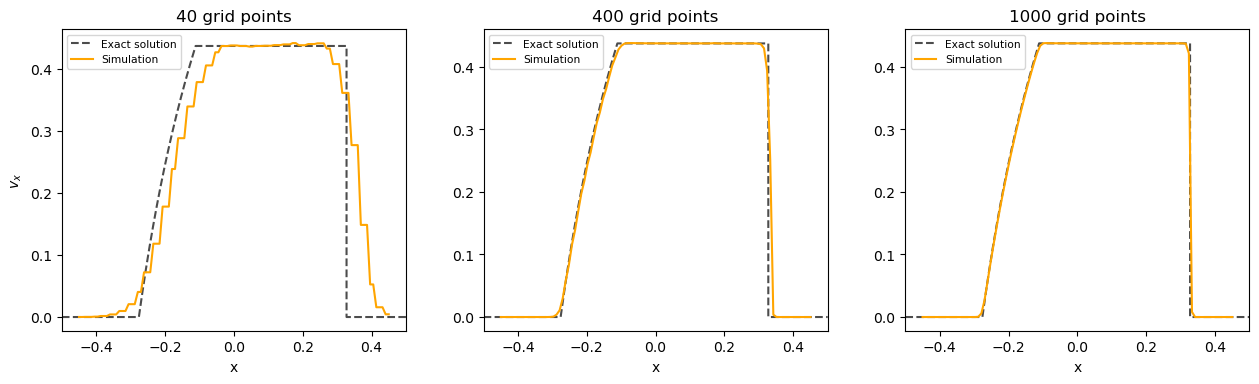

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13, 4))
fig.tight_layout(pad=2.5)

ax1.plot(x_exact, vx_exact, label="Exact solution", linestyle='--', c='black', alpha=0.7)
ax1.plot(*vx_final_40.coordinates_meshgrid(), vx_final_40.data_xyz, label="Simulation", c='orange')
ax1.set_xlim(-0.5, 0.5)
ax1.set_xlabel('x')
ax1.set_ylabel('$v_x$')
ax1.set_title('40 grid points')
ax1.legend(fontsize="7.7")

ax2.plot(x_exact, vx_exact, label="Exact solution", linestyle='--', c='black', alpha=0.7)
ax2.plot(*vx_final_400.coordinates_meshgrid(), vx_final_400.data_xyz, label="Simulation", c='orange')
ax2.set_xlim(-0.5, 0.5)
ax2.set_xlabel('x')
ax1.set_ylabel('$v_x$')
ax2.set_title('400 grid points')
ax2.legend(fontsize="7.7")

ax3.plot(x_exact, vx_exact, label="Exact solution", linestyle='--', c='black', alpha=0.7)
ax3.plot(*vx_final_1000.coordinates_meshgrid(), vx_final_1000.data_xyz, label="Simulation", c='orange')
ax3.set_xlim(-0.5, 0.5)
ax3.set_xlabel('x')
ax1.set_ylabel('$v_x$')
ax3.set_title('1000 grid points')
ax3.legend(fontsize="7.7")


fig.savefig('vx.png', facecolor='w', transparent=False, dpi=300)

### Pressure

In [17]:
press_final_1000 = press_1000.read_on_grid(500, small_grid)
press_final_400 = press_400.read_on_grid(200, small_grid)
press_final_40 = press_40.read_on_grid(100, small_grid)
press_initial = press_40.read_on_grid(0, small_grid)

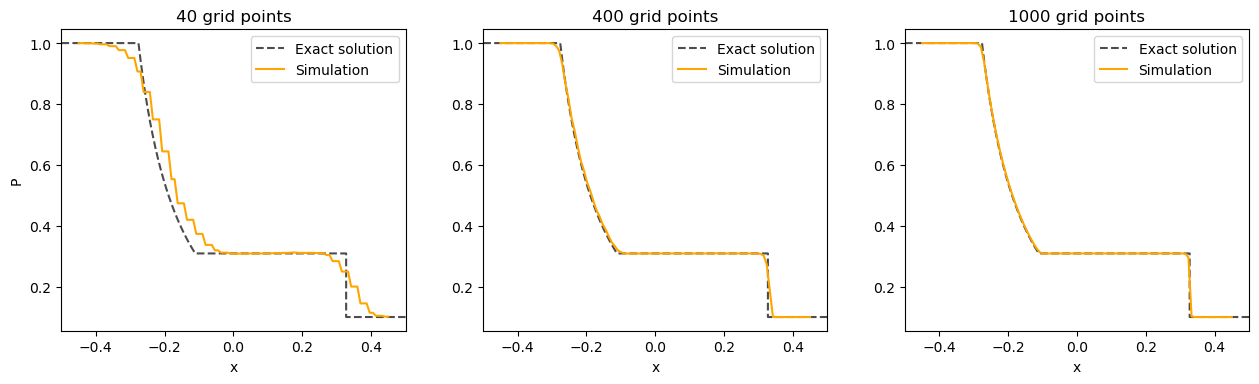

In [18]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13, 4))
fig.tight_layout(pad=2.5)

ax1.plot(x_exact, press_exact, label="Exact solution", linestyle='--', c='black', alpha=0.7)
ax1.plot(*press_final_40.coordinates_meshgrid(), press_final_40.data_xyz, label="Simulation", c='orange')
ax1.set_xlim(-0.5, 0.5)
ax1.set_xlabel('x')
ax1.set_ylabel(r'$\rho$')
ax1.set_title('40 grid points')
ax1.legend()

ax2.plot(x_exact, press_exact, label="Exact solution", linestyle='--', c='black', alpha=0.7)
ax2.plot(*press_final_400.coordinates_meshgrid(), press_final_400.data_xyz, label="Simulation", c='orange')
ax2.set_xlim(-0.5, 0.5)
ax2.set_xlabel('x')
ax1.set_ylabel('P')
ax2.set_title('400 grid points')
ax2.legend()

ax3.plot(x_exact, press_exact, label="Exact solution", linestyle='--', c='black', alpha=0.7)
ax3.plot(*press_final_1000.coordinates_meshgrid(), press_final_1000.data_xyz, label="Simulation", c='orange')
ax3.set_xlim(-0.5, 0.5)
ax3.set_xlabel('x')
ax1.set_ylabel('P')
ax3.set_title('1000 grid points')
ax3.legend()

fig.savefig('press.png', facecolor='w', transparent=False, dpi=300)

## Initial conditions

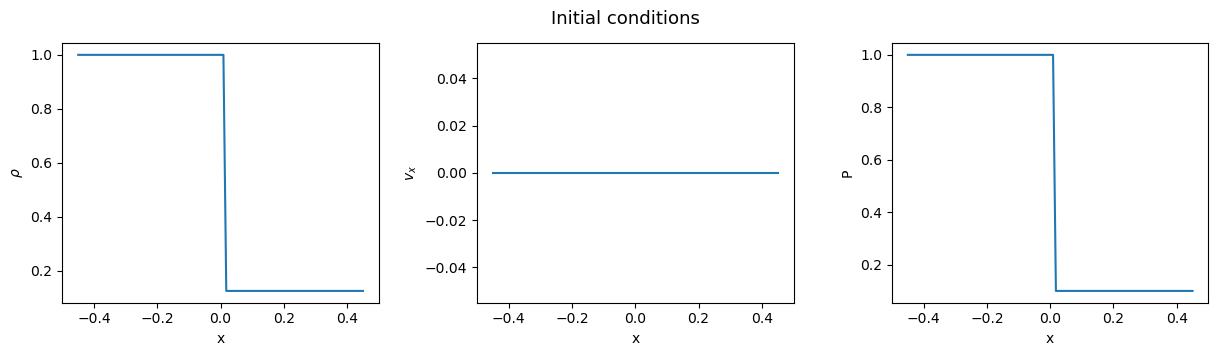

In [19]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13, 4))
fig.tight_layout(pad=4)

ax1.plot(*rho_initial.coordinates_meshgrid(), rho_initial.data_xyz)
ax1.set_xlim(-0.5, 0.5)
ax1.set_xlabel('x')
ax1.set_ylabel(r'$\rho$')

ax2.plot(*vx_initial.coordinates_meshgrid(), vx_initial.data_xyz)
ax2.set_xlim(-0.5, 0.5)
ax2.set_xlabel('x')
ax2.set_ylabel('$v_x$')

ax3.plot(*press_initial.coordinates_meshgrid(), press_initial.data_xyz)
ax3.set_xlim(-0.5, 0.5)
ax3.set_xlabel('x')
ax3.set_ylabel('P')

fig.suptitle('Initial conditions', y=0.93, fontsize=13)

fig.savefig('IC.png', facecolor='w', transparent=False, dpi=300)